# SEATTLE WEATHER PROJECT

# INTRODUCTION

We need to understand the climate, particularly the amount of rainfall in a given place, as excessive rainfall can lead to problems, while a lack of rainfall can also cause issues. Which is why the project mainly focuses on identifying the amount of rainfall in Seattle and a city I am completely unaware of but much more curious about, which is Tampa. This project aims to compare the rainfall in Seattle, Washington, and Tampa, Florida, based on two main attributes from the dataframe, date and precipitation, for the time period 2018 to 2022. This is what we will be mainly focusing on in this project, to identify which city has more rainfalls and which city receives the most rainfall and the precipitation levels in both the cities.

The specific questions that were being analysed here are:

1. Which city, Seattle or Tampa, receives the most rainfall during the 2018–2022 period?
2. How do seasonal and monthly precipitation patterns differ between Seattle and Tampa?
3. How frequently do rainy days occur in each city, and what can that tell us about the climate differences?

## DATASET DESCRIPTION

#### Data Sources

Seattle: Seattle Rain Dataset (CSV, https://github.com/brian-fischer/DATA-5100/blob/main/weather/seattle_rain.csv )
1. Data downloaded from the DATA 5100 public GitHub repository. 
2. The size of the dataset is 129.7+ KB, which is in CSV format, The primary columns are: Date (datetime), Precipitation (inches), Station.

Tampa: Tampa Weather Data (CSV, https://www.ncei.noaa.gov/cdo-web/orders?email=smurala@seattleu.edu&id=4131968)
1. Data obtained from NOAA’s National Centers for Environmental Information (NCEI).
2. The size of the dataset is 3.6+ MB, which is in CSV format, The primary columns are: Date (datetime), Precipitation (inches), Station.

# DATA COLLECTION

-> The very first thing when working on a project is import the libraries that were required to explore and work on the dataset, Here I imported the necessary libraries:
1. Here the 'pandas' and 'numpys' will be used to handle the data and perform the numerical operations.
2. The matplotlib and seaborn are used to plot the data for better visualization of rainfall trends across both cities.
3. Whitegrid style is set for better understanding and clean visulaizations with better readability of plots.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

The libraries were sucessfully imported, which ensures that i have the required tools to perform data cleaning, analyzing, manipulation and visualization.

-> In this step, we load our two main datasets, the Seattle and Tampa weather csv files using Pandas. This allows us to perform direct comparison and manipulation using dataframe objects. Each dataset contains daily precipitation values, which are crucial for analysing the weather project.

In [2]:
df_seattle=pd.read_csv("C:/Users/SRAVYASRI/Downloads/DATA 5100_Foundations of data science/Weather/data/seattle_rain.csv")

In [3]:
df_tampa=pd.read_csv("C:/Users/SRAVYASRI/Downloads/DATA 5100_Foundations of data science/Weather/data/Tampa.csv")

Here both the datasets were sucessfully loaded as two separate datasets seattle and tampa.

## DATA UNDERSTANDING

-> Here we are exploring the dataset with head, This function gives the number of columns to get a overview about what were present in the dataset. Displaying the first 5 rows of the datasets helps us understand the dataset structure, including available columns and sample values. 

In [4]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


Here we can see what was present in the dataset, when we just give head() function, it defaults to displaying the first 5 observations. This step is essential for verifying that the data loaded correctly and for further cleaning or transformations.

-> Here the value inside head(10) indicates that head gives us the 10 observations of the dataset.

In [5]:
df_tampa.head(10)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-01,NaN,NaN,0.00,0.0,NaN
1,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-02,NaN,NaN,0.02,NaN,NaN
2,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-03,NaN,NaN,0.40,NaN,NaN
3,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-04,NaN,NaN,0.33,NaN,NaN
4,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-05,NaN,NaN,0.00,0.0,NaN
5,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-06,NaN,NaN,0.00,0.0,NaN
6,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-07,NaN,NaN,0.00,0.0,NaN
7,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-08,NaN,NaN,0.00,0.0,NaN
8,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-12,4.0,0.56,NaN,NaN,NaN
9,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-13,NaN,NaN,0.05,NaN,NaN


-> Checking the type of the loaded data confirms that the data is stored in Pandas DataFrames, which support powerful data manipulation functions needed for analysis.

In [6]:
type(df_seattle)

pandas.core.frame.DataFrame

In [7]:
type(df_tampa)

pandas.core.frame.DataFrame

type() function is used when we want to investigate the type of dataset we have, Here it is the dataframes.

-> In this step, we inspect the columns present in each dataset using the columns attribute. This attribute returns the names of all columns in a DataFrame as list, which helps us understand the structure and available features in the dataset.

In [8]:
df_seattle.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'WESD', 'WESF'],
      dtype='object')

In [9]:
df_tampa.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD'], dtype='object')

By comparing the columns of the Seattle and Tampa datasets, we can identify differences that might require handling properly during analysis. For example the Seattle dataset contains more columns than the Tampa dataset, which may affect what analyses can be directly compared or merged.

-> Here the info() function gives the information such as column names, datatypes, memory usage and the information about NAN(Not a number) values.

In [10]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


In [11]:
df_tampa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59082 entries, 0 to 59081
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  59082 non-null  object 
 1   NAME     59082 non-null  object 
 2   DATE     59082 non-null  object 
 3   DAPR     573 non-null    float64
 4   MDPR     569 non-null    float64
 5   PRCP     58488 non-null  float64
 6   SNOW     32336 non-null  float64
 7   SNWD     4554 non-null   float64
dtypes: float64(5), object(3)
memory usage: 3.6+ MB


Here after comparing the number of entries were more in tampa > seattle (the amount of data is less in the seattle dataset, and huge data means more memory usage. This is really important and essential for handling missing values correctly.

-> In this step we are inspecting each column individually we use the dataframe['columnname'] which is the ["STATION"] to get the data from an individual column.

In [12]:
df_seattle["STATION"]

0       US1WAKG0225
1       US1WAKG0225
2       US1WAKG0225
3       US1WAKG0225
4       US1WAKG0225
           ...     
1653    US1WAKG0225
1654    US1WAKG0225
1655    US1WAKG0225
1656    US1WAKG0225
1657    US1WAKG0225
Name: STATION, Length: 1658, dtype: object

In [13]:
df_tampa["STATION"]

0        US1FLHB0027
1        US1FLHB0027
2        US1FLHB0027
3        US1FLHB0027
4        US1FLHB0027
            ...     
59077    US1FLPN0060
59078    US1FLPN0060
59079    US1FLPN0060
59080    US1FLPN0060
59081    US1FLPN0060
Name: STATION, Length: 59082, dtype: object

We can see the length of the data and the entries present in the column STATION from both seattle and tampa dataset. Checking this column will help us in making important decisions on which stations to include or exclude while performing the analysis.

-> The Unique() function gives the names of the unique stations. It is used to check the unquie entries in our dataset.

In [14]:
df_seattle["STATION"].unique()

array(['US1WAKG0225'], dtype=object)

In [15]:
df_tampa["STATION"].unique()

array(['US1FLHB0027', 'US1FLHB0029', 'US1FLPN0091', 'US1FLPN0090',
       'US1FLHB0141', 'US1FLHB0140', 'US1FLHB0143', 'USW00012873',
       'USC00088824', 'US1FLHB0026', 'US1FLHB0147', 'US1FLPN0057',
       'US1FLPS0075', 'US1FLPN0016', 'US1FLPN0093', 'US1FLPN0092',
       'US1FLPN0094', 'US1FLPN0096', 'US1FLPN0055', 'US1FLHB0116',
       'US1FLHB0115', 'US1FLHB0152', 'USW00012842', 'US1FLHB0112',
       'US1FLHB0156', 'US1FLHB0037', 'US1FLHB0036', 'US1FLPN0123',
       'US1FLPN0089', 'US1FLPN0122', 'US1FLPN0047', 'US1FLPS0065',
       'US1FLPN0049', 'US1FLPN0082', 'US1FLPN0083', 'US1FLPN0086',
       'US1FLPN0121', 'US1FLHB0005', 'US1FLPN0108', 'US1FLHB0120',
       'US1FLHB0167', 'US1FLHB0048', 'US1FLHB0168', 'US1FLPN0079',
       'US1FLPN0112', 'US1FLPN0034', 'US1FLPN0111', 'US1FLPN0036',
       'US1FLPN0116', 'US1FLPN0115', 'US1FLHB0040', 'US1FLPN0071',
       'US1FLPN0072', 'US1FLPN0033', 'US1FLHB0138', 'US1FLHB0055',
       'US1FLHB0010', 'US1FLHB0090', 'US1FLPN0105', 'US1FLHB00

So in the output we can see from the STATION column of both the datasets, 1 unique station in seattle dataset whereas 63 unique stations in tampa dataset. This shows that Tampa is more varied data source may influence how we approach cleaning and analysis steps. 

-> I used the Shape attribute to check the total count of Rows X columns of the dataframe

In [16]:
print(df_seattle.shape)

(1658, 10)


In [17]:
df_tampa.shape

(59082, 8)

Which is 1658 rows, and 10 columns in seattle dataframe, and 59082 rows and 8 columns in the tampa dataframe.

-> In the next step i am checking the DATE column in both seattle and tampa datasets because the format of it may vary in different datasets which could lead to incorrect merging, filtering during anlaysis.

In [18]:
df_seattle['DATE']

0         1/1/18
1         1/2/18
2         1/3/18
3         1/4/18
4         1/5/18
          ...   
1653    12/27/22
1654    12/28/22
1655    12/29/22
1656    12/30/22
1657    12/31/22
Name: DATE, Length: 1658, dtype: object

In [19]:
df_tampa['DATE']

0        2018-01-01
1        2018-01-02
2        2018-01-03
3        2018-01-04
4        2018-01-05
            ...    
59077    2022-12-27
59078    2022-12-28
59079    2022-12-29
59080    2022-12-30
59081    2022-12-31
Name: DATE, Length: 59082, dtype: object

As we can see the data formats are very different in the both datasets. we see that the Seattle dataset uses a "MM/DD/YY" format (1/1/18), while the Tampa dataset uses "YYYY-MM-DD" format (2018-01-01). Its really important to ensure both the datasets follow the same format before performing any sort of analysis.

-> Here the max() function is used to check the last date of the table from the DATE column as written.  And the tail() fucntion returns the last 5 rows of the dataset by default when we dont pass any values inside it.

In [20]:
df_seattle['DATE'].max()

'9/9/22'

In [21]:
df_seattle['DATE'].tail()

1653    12/27/22
1654    12/28/22
1655    12/29/22
1656    12/30/22
1657    12/31/22
Name: DATE, dtype: object

In [22]:
df_tampa['DATE'].max()

'2022-12-31'

In [23]:
df_tampa['DATE'].tail()

59077    2022-12-27
59078    2022-12-28
59079    2022-12-29
59080    2022-12-30
59081    2022-12-31
Name: DATE, dtype: object

Here we can see that the date is incorrect when we checked the last 5 rows of seattle dataset, as '12/31/22' is considered the last date in Seattle regardless of the actual data which is showing us the '9/9/22' as the max date. For reasons like this, it is really important to ensure that both datasets follow the same date format.

-> Here I am checking the data type of the DATE column using the dtype attribute to see if both outputs show the data type as object, indicating that the dates are stored as strings rather than as proper datetime objects.

In [24]:
print("Seattle datetime type:", df_seattle['DATE'].dtype)
print("Tampa datetime type:", df_tampa['DATE'].dtype)

Seattle datetime type: object
Tampa datetime type: object


Here its telling the DATE column is in object format but not in datetime64[ns] format. Which needs to be corrected as it may lead to incorrect analysis.

# DATA PREPARATION / CLEANING

-> The Pandas provides a function called 'to_datetime' to convert a column to datetime format. Since we observed that the Seattle dataset was giving incorrect results, I now convert its date column to datetime format.

In [25]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'], format='%m/%d/%y')

In [26]:
df_seattle['DATE'] 

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1653   2022-12-27
1654   2022-12-28
1655   2022-12-29
1656   2022-12-30
1657   2022-12-31
Name: DATE, Length: 1658, dtype: datetime64[ns]

In [27]:
df_tampa['DATE'] = pd.to_datetime(df_tampa['DATE'], format='%Y-%m-%d')

In [28]:
df_tampa['DATE']

0       2018-01-01
1       2018-01-02
2       2018-01-03
3       2018-01-04
4       2018-01-05
           ...    
59077   2022-12-27
59078   2022-12-28
59079   2022-12-29
59080   2022-12-30
59081   2022-12-31
Name: DATE, Length: 59082, dtype: datetime64[ns]

We can see that the date format is different in both datasets. To work on the code effectively, we need to ensure that both datasets follow the same format. The tampa datatime is valid but it is in a different format so we changed the format to match both the datasets.

-> Here we are checking the DATE column again to verify if its data type has changed from object to datetime64[ns] and whether the changes were applied correctly.

In [29]:
print("Seattle dates:\n", df_seattle['DATE'].head())
print("Tampa dates:\n", df_tampa['DATE'].head())

Seattle dates:
 0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
Name: DATE, dtype: datetime64[ns]
Tampa dates:
 0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
Name: DATE, dtype: datetime64[ns]


Now we can see that both the DATE columns were changed to datetime64[ns]

-> To check the range of dates, min() and max() were used. min() returns the earliest date in the dataset, while max() returns the latest date.

We used the agg() function to get both the minimum and maximum dates at once. It is important as we are merging the two datasets , the dates data should match along with the format.

In [30]:
df_seattle['DATE'].agg(['min', 'max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

In [31]:
df_tampa['DATE'].agg(['min', 'max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

We can see that the minimum and maximum dates, as well as the datetime formats, match in both datasets. It shows that the conversion preserved the data values.

#### The libraries matplotlib and seaborn were used to visually represent the data. In matplotlib, plt.figure() sets the figure size, plt.xlabel() assigns a label to the x-axis, and plt.ylabel() assigns a label to the y-axis, with the specified font size. In seaborn, sns.lineplot() is used to draw a line graph for the specified x and y columns of the dataset, in this case, the Seattle dataset.

-> In this step, I use a line plot to visualize daily precipitation amounts in Seattle from 2018 to 2022. By plotting DATE on the x-axis and PRCP which is precipitation in inches on the y-axis, this graph allows us to observe daily rainfall patterns, identify trends or seasonal cycles, and spot any unusual events. This visualization provides essential context for subsequent analysis, such as extreme rainfall periods that might affect the city’s climate assessment.

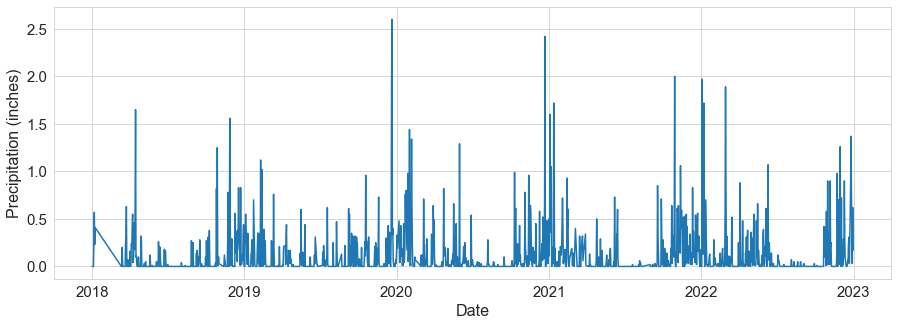

In [32]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_seattle, x='DATE', y='PRCP')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Precipitation (inches)', fontsize=16)

plt.tick_params(labelsize=15)
plt.show()

From the lineplot, we can observe a noticeable steep in precipitation at the start of 2018, followed by more variable rainfalls across the remaining years. This initial steep slope indicates the presence of outliers.

-> Here I am checking the cause for the steep slope from the graph plotted, by taking a certain number of observations.

In [33]:
df_seattle.head(20)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-06,NaN,NaN,0.57,NaN,NaN,NaN,NaN
6,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-07,NaN,NaN,0.23,NaN,NaN,NaN,NaN
7,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-08,NaN,NaN,0.41,NaN,NaN,NaN,NaN
8,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-12,NaN,NaN,0.00,NaN,NaN,NaN,NaN
9,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-13,NaN,NaN,0.00,NaN,NaN,NaN,NaN


We can observe that the steepness is not actual rain, it’s due to missing dates in the dataset.

-> In this step we are visualizing the precipitation in tampa city from 2018 to 2022 using a line plot, with x axis as date, and y axis mentioning precipitation in inches, this produces time series line plot showing the daily precipitation of tampa which helps in visually inspecting the rainfall distribution over several years.

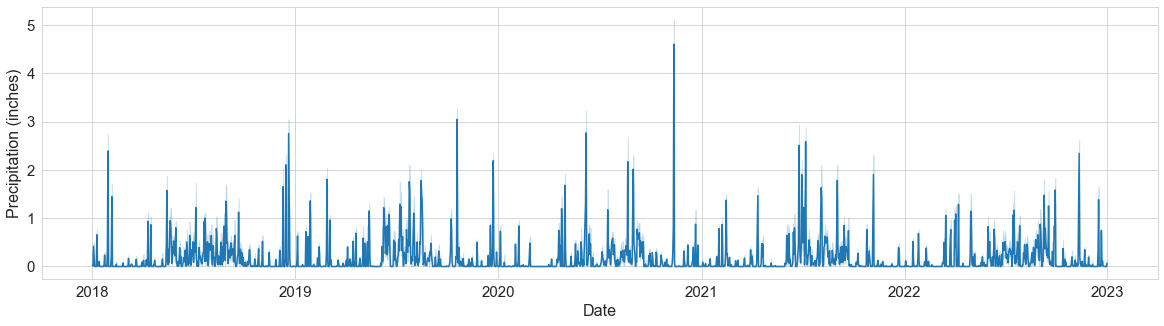

In [34]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_tampa, x='DATE', y='PRCP')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Precipitation (inches)', fontsize=16)

plt.tick_params(labelsize=15)

plt.show()

Here we can actually see the graph but couldnt point out the missing values for the tampa dataset as the dataset is huge, so we then check the observations for more detailed understanding of the data.

In [35]:
df_tampa.head(20)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-01,NaN,NaN,0.00,0.0,NaN
1,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-02,NaN,NaN,0.02,NaN,NaN
2,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-03,NaN,NaN,0.40,NaN,NaN
3,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-04,NaN,NaN,0.33,NaN,NaN
4,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-05,NaN,NaN,0.00,0.0,NaN
5,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-06,NaN,NaN,0.00,0.0,NaN
6,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-07,NaN,NaN,0.00,0.0,NaN
7,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-08,NaN,NaN,0.00,0.0,NaN
8,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-12,4.0,0.56,NaN,NaN,NaN
9,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-13,NaN,NaN,0.05,NaN,NaN


We can see that there is no recorded precipitation data for some days in the tampa dataset, and due to the huge dataset we couldnt point the steep jumps in tampa dataset.

-> So now we are also checking the precipitation column the primary columns of interest. By displaying all values in the column, I confirm the data type as float64, which is appropriate for continuous precipitation measurements in inches. Inspecting these values helps verify that the precipitation data is correctly formatted and provides a quick check for any unusual patterns, such as outliers, missing values, or negative numbers that would require further cleaning before analysis.

In [36]:
df_seattle.loc[:, 'PRCP']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.25
        ... 
1653    0.78
1654    0.40
1655    0.03
1656    0.62
1657    0.17
Name: PRCP, Length: 1658, dtype: float64

Here we can see all rows starting from 0-1657, and the type of data is float.

-> The precipitation and here the loc used to access a set of rows and columns, here the : means all rows and the PRCP is the column.

In [37]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN


-> In this step I am checking the three main columns that were required for analysis.

In [38]:
df_seattle[['STATION', 'DATE', 'PRCP']]

,STATION,DATE,PRCP
0,US1WAKG0225,2018-01-01,0.00
1,US1WAKG0225,2018-01-02,0.00
2,US1WAKG0225,2018-01-03,0.00
3,US1WAKG0225,2018-01-04,0.00
4,US1WAKG0225,2018-01-05,0.25
...,...,...,...
1653,US1WAKG0225,2022-12-27,0.78
1654,US1WAKG0225,2022-12-28,0.40
1655,US1WAKG0225,2022-12-29,0.03
1656,US1WAKG0225,2022-12-30,0.62


We can get the same result using loc method, which allows selection by column names and works well for slicing.

-> Here > 0 checks if the precipitation is greater than 0, this creates a boolean output.

In [39]:
df_seattle['PRCP'] > 0

0       False
1       False
2       False
3       False
4        True
        ...  
1653     True
1654     True
1655     True
1656     True
1657     True
Name: PRCP, Length: 1658, dtype: bool

In Python, True is treated as 1 and False as 0. So, summing a boolean series like the above code gives the count of days with precipitation. For Seattle, this sum is 841, indicating 841 rainy days in the dataset.

In [40]:
sum(df_seattle['PRCP'] > 0)

841

-> This acts as a filter to the dataframe, where it gives all the columns but gives only the rows of rainy days

In [41]:
df_seattle[df_seattle['PRCP'] > 0]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-06,NaN,NaN,0.57,NaN,NaN,NaN,NaN
6,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-07,NaN,NaN,0.23,NaN,NaN,NaN,NaN
7,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-08,NaN,NaN,0.41,NaN,NaN,NaN,NaN
10,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-14,NaN,NaN,0.20,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1653,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-27,NaN,NaN,0.78,NaN,NaN,NaN,NaN
1654,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-28,NaN,NaN,0.40,NaN,NaN,NaN,NaN
1655,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-29,NaN,NaN,0.03,NaN,NaN,NaN,NaN
1656,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-30,NaN,NaN,0.62,NaN,NaN,NaN,NaN


This returns all rows where the precipitation is greater than 0, showing only rainy days in the Seattle dataset.

-> Here, greater than equal to 0.5 creates a boolean series to check if precipiation is greater than equal to 0.5, and precp less than or equal to 0.75 the and operator here combines the both conditions

In [42]:
df_seattle[(df_seattle['PRCP'] >= 0.5) & (df_seattle['PRCP'] <= 0.75)]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-06,NaN,NaN,0.57,NaN,NaN,NaN,NaN
20,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-24,NaN,NaN,0.63,NaN,NaN,NaN,NaN
35,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-04-08,NaN,NaN,0.55,NaN,NaN,NaN,NaN
41,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-04-14,NaN,NaN,0.68,NaN,NaN,NaN,NaN
271,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-12-10,NaN,NaN,0.56,NaN,NaN,NaN,NaN
296,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-01-04,NaN,NaN,0.55,NaN,NaN,NaN,NaN
313,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-01-23,NaN,NaN,0.70,NaN,NaN,NaN,NaN
331,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-02-11,NaN,NaN,0.70,4.0,NaN,NaN,NaN
419,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-05-17,NaN,NaN,0.60,NaN,NaN,NaN,NaN
472,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-07-19,NaN,NaN,0.62,NaN,NaN,NaN,NaN


Shows the data that is > or equal to 0.5 and less than or equal to 0.75

-> In The step df_tampa['DATE'] >= '2018-01-01' generates a boolean Series or we can take the data as per name rather than explicitly metioning.

In [43]:
df_tampa = df_tampa.loc[df_tampa['DATE'] >= '2018-01-01']
df_tampa.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-01,NaN,NaN,0.00,0.0,NaN
1,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-02,NaN,NaN,0.02,NaN,NaN
2,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-03,NaN,NaN,0.40,NaN,NaN
3,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-04,NaN,NaN,0.33,NaN,NaN
4,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-05,NaN,NaN,0.00,0.0,NaN


-> To analyse data for only one weather station in Tampa, we can filter the dataset using a condition on the NAME column.

In [44]:
df_tampa = df_tampa.loc[df_tampa['NAME'] == 'LUTZ 1.3 SSE, FL US']
df_tampa.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-01,NaN,NaN,0.00,0.0,NaN
1,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-02,NaN,NaN,0.02,NaN,NaN
2,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-03,NaN,NaN,0.40,NaN,NaN
3,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-04,NaN,NaN,0.33,NaN,NaN
4,US1FLHB0027,"LUTZ 1.3 SSE, FL US",2018-01-05,NaN,NaN,0.00,0.0,NaN


The df_tampa is filtered and all other stations data are removed. This is useful to analyze data for one particular station

This creates a boolean series where each row is True if the NAME matches 'LUTZ 1.3 SSE, FL US' and False otherwise.

-> To directly compare daily precipitation between Seattle and Tampa, I merge the two datasets on their DATE columns. Using an outer join ensures that all dates present in either city’s data are included in the result. This approach lets us retain all observations, even if one city lacks a record for a particular date. Suffixes are added to distinguish the precipitation columns from each city.

In [45]:
df = df_tampa[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='outer', suffixes=('_tampa', '_seattle'))

-> To confirm the size of the merged dataset, I use the .shape attribute. This returns a tuple with the number of rows and columns. Knowing the dataset dimensions is useful for planning further analysis which also helps us verify that all records from both original datasets are represented.

In [46]:
df.shape

(1812, 3)

This ouput indicates the final merged DataFrame contains 1,812 dates rows and 3 columns which are the date, Tampa precipitation, and Seattle precipitation.

In [47]:
df

,DATE,PRCP_tampa,PRCP_seattle
0,2018-01-01,0.00,0.00
1,2018-01-02,0.02,0.00
2,2018-01-03,0.40,0.00
3,2018-01-04,0.33,0.00
4,2018-01-05,0.00,0.25
...,...,...,...
1807,2022-07-21,NaN,0.00
1808,2022-07-29,NaN,0.00
1809,2022-08-23,NaN,0.00
1810,2022-11-27,NaN,0.26


-> I used the pd.melt() function to keep the DATE column fixed and turn the city columns into two columns, one for the city name and one for the precipitation values. This makes the data longer and easier to use for plotting and group analysis.

In [48]:
df = pd.melt(df, id_vars='DATE', var_name='city', value_name='precipitation')

Here, DATE is kept as the identifier column, while the other columns city and precipitation holding original column names and values.

In [49]:
df.head()

,DATE,city,precipitation
0,2018-01-01,PRCP_tampa,0.00
1,2018-01-02,PRCP_tampa,0.02
2,2018-01-03,PRCP_tampa,0.40
3,2018-01-04,PRCP_tampa,0.33
4,2018-01-05,PRCP_tampa,0.00


Here i am checking the merged dataset, the starting observations contains the tampa dataset details.

In [50]:
df.tail()

,DATE,city,precipitation
3619,2022-07-21,PRCP_seattle,0.00
3620,2022-07-29,PRCP_seattle,0.00
3621,2022-08-23,PRCP_seattle,0.00
3622,2022-11-27,PRCP_seattle,0.26
3623,2022-12-21,PRCP_seattle,0.31


The last observations contains the seattle dataset details.

-> In this step, After melting I rename the city codes to meaningful and understandable codes. This enhances the readability of the dataset and makes subsequent plots and summaries easier to interpret.

In [51]:
df.loc[df['city'] == 'PRCP_x', 'city'] = 'SEA'
df.loc[df['city'] == 'PRCP_y', 'city'] = 'TMP'

All entries that were are changed to the mentioned codes for Seattle, and for Tampa. 

-> To make the city names easier to work with, we can convert all entries in the city column to lowercase. This ensures uniformity in the city names, which is critical when performing case-sensitive operations such as filtering or plotting. By standardizing to lowercase, we minimize risk of mismatches due to inconsistent capitalization in the data.

In [52]:
df['city'] = df['city'].str.lower()

This line makes the .str.lower() method to the city column, converting all uppercase and mixed-case characters to lowercase.

In [53]:
df.head()

,DATE,city,precipitation
0,2018-01-01,prcp_tampa,0.00
1,2018-01-02,prcp_tampa,0.02
2,2018-01-03,prcp_tampa,0.40
3,2018-01-04,prcp_tampa,0.33
4,2018-01-05,prcp_tampa,0.00


In [54]:
df.tail()

,DATE,city,precipitation
3619,2022-07-21,prcp_seattle,0.00
3620,2022-07-29,prcp_seattle,0.00
3621,2022-08-23,prcp_seattle,0.00
3622,2022-11-27,prcp_seattle,0.26
3623,2022-12-21,prcp_seattle,0.31


-> We can use rename to turn the uppercase to lowercase also using the same rename with curly braces

In [55]:
df = df.rename(columns={'DATE': 'date'})

This line renames the DATE column to date to avoid errors caused by case sensitivity.

In [56]:
df.head()

,date,city,precipitation
0,2018-01-01,prcp_tampa,0.00
1,2018-01-02,prcp_tampa,0.02
2,2018-01-03,prcp_tampa,0.40
3,2018-01-04,prcp_tampa,0.33
4,2018-01-05,prcp_tampa,0.00


It is important to determine the non-null values so we use the notna to check the non-null values in each column of our dataset

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3624 entries, 0 to 3623
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3624 non-null   datetime64[ns]
 1   city           3624 non-null   object        
 2   precipitation  3361 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.1+ KB


-> Before performing analysis, its important to check how many non missing values exist in each column.

In [58]:
df.notna().sum()

date             3624
city             3624
precipitation    3361
dtype: int64

This line gives the count of non-NA, non-missing values in each column of the dataframe.

-> To identify any missing data in our dataset, I checked which values are non null values.

In [59]:
df.isna().sum()

date               0
city               0
precipitation    263
dtype: int64

This line gives the count of missing values in each column of the dataframe.

-> It is used to specifically check particular city columns that has non null values

In [60]:
df.loc[df['city'] == 'SEA', 'precipitation'].isna().sum()

0

In [61]:
df.loc[df['city'] == 'TMP', 'precipitation'].isna().sum()

0

Which is giving 0 in this case for both cities.

-> This code creates a new column, day_of_year, in the DataFrame. This column is calculated using the DatetimeIndex, which returns an integer from 1 to 365 (or 366 for leap years) representing the day’s position in integer within the year.

In [62]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year
df.head(10)

,date,city,precipitation,day_of_year
0,2018-01-01,prcp_tampa,0.00,1
1,2018-01-02,prcp_tampa,0.02,2
2,2018-01-03,prcp_tampa,0.40,3
3,2018-01-04,prcp_tampa,0.33,4
4,2018-01-05,prcp_tampa,0.00,5
5,2018-01-06,prcp_tampa,0.00,6
6,2018-01-07,prcp_tampa,0.00,7
7,2018-01-08,prcp_tampa,0.00,8
8,2018-01-12,prcp_tampa,NaN,12
9,2018-01-13,prcp_tampa,0.05,13


This line creates a new column day_of_year that represents the day number for each date in the date column.

-> In this step the code filters the DataFrame for Seattle data, then groups by the day_of_year column and computes the mean precipitation for each day. 

In [63]:
mean_day_precipitation = df.loc[
    df['city'] == 'prcp_seattle',  
    ['precipitation', 'day_of_year']
].groupby('day_of_year').mean().reset_index()

The ouput is a new DataFrame where each row represents the average rainfall for a specific day of the year providing a clear view of Seattle’s annual precipitation cycle.

-> To visually examine Seattle's average rainfall trends throughout the year, I plot the mean daily precipitation for each day of the year, using data averaged across all years. This line plot makes it easy to see how precipitation varies as its crucial for identifying seasonal patterns in Seattle's climate.

<AxesSubplot:xlabel='day_of_year', ylabel='precipitation'>

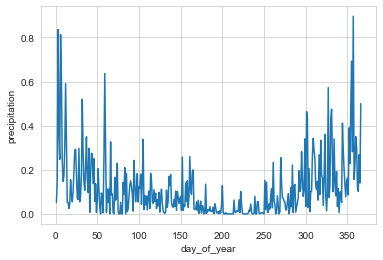

In [64]:
sns.lineplot(data=mean_day_precipitation, x='day_of_year', y='precipitation')

In the graph we observe that Seattle experiences higher average precipitation at the start and end of the year, with a dip during the middle months. This reflects Seattle's characteristic wet winters and dryer summers. The spikes at the ends of the plot indicate typically rainier periods, while the lower lines through the middle correspond to drier months.

-> By using reset index, we convert day of the year from an index back into a regular column.

In [65]:
mean_day_precipitation = mean_day_precipitation.reset_index()
print(mean_day_precipitation.head())

   index  day_of_year  precipitation
0      0            1       0.052000
1      1            2       0.150000
2      2            3       0.836000
3      3            4       0.370000
4      4            5       0.246667


Now we can see the index, day of year and precipitation columns with the mean values for precipitation column.

-> In this step, the line plot above displays Seattle's mean daily precipitation averaged across all available years for each day of the year. The x-axis represents the day of the year, and the y-axis shows the average precipitation in inches. 

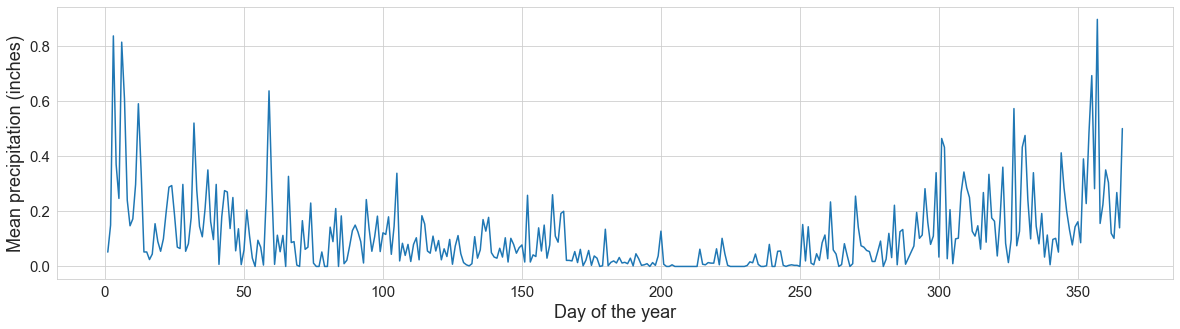

In [66]:
plt.figure(figsize=(20, 5))
plt.plot(mean_day_precipitation['day_of_year'], mean_day_precipitation['precipitation'])
plt.xlabel('Day of the year', fontsize=18)
plt.ylabel('Mean precipitation (inches)', fontsize=18)
plt.tick_params(labelsize=15)
plt.show()

From the plot, we observe much higher average rainfall at the very start and end of the year, while the summer months the days roughly between 180 and 270 experience comparatively lower precipitation. This visualization clearly captures Seattle's seasonal rainfall pattern the wet winters and dry summers. The frequent spikes, especially at the beginning and end of year, represent days with unusually high rainfall averaged over multiple years.

In [67]:
indices = np.where(df['precipitation'].isna() == True)[0]
indices

array([   8,  122,  185,  348,  483,  632,  737,  974,  975, 1027, 1091,
       1477, 1535, 1613, 1649, 1731, 1741, 1742, 1743, 1744, 1745, 1746,
       1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757,
       1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768,
       1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779,
       1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790,
       1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801,
       1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1820,
       1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831,
       1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842,
       1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853,
       1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864,
       1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875,
       1876, 1877, 1878, 2056, 2097, 2098, 2099, 21

## HANDLING MISSING VALUES


Here we are checking if the null values are present in the dataframe.

In [68]:
df.isna().sum()

date               0
city               0
precipitation    263
day_of_year        0
dtype: int64

As per the ouput we can see the presence of null values in the precipitation attribute, we have to handle the null values in the further analysis.

-> Here this block calculates the average precipitation for each day of the year and fills the missing precipitation values with days average. This fills the missing values in the precipitation column by replacing them with the mean precipitation for the specific day of the year.

In [69]:
mean_day_precipitation = df.groupby("day_of_year")["precipitation"].mean()
df["precipitation"] = df["precipitation"].fillna(
    df["day_of_year"].map(mean_day_precipitation)
)


In [70]:
df.isna().sum()

date             0
city             0
precipitation    0
day_of_year      0
dtype: int64

We can see the null values are handled for the further analysing.

In [71]:
df.to_csv('clean_seattle_tampa_weather.csv', encoding='utf-8-sig', index=False)

This block exports the final cleaned weather dataset to a CSV file with proper structure, making it ready for further analysis.

# VISUALIZATIONS


-> In This block of code generates a line graph that visualizes the daily precipitation trends for both cities Tampa and Seattle. This plot reflects the new precipitation values after filling missing data, providing a continuous and accurate representation of daily rainfall over the years. It helps visually compare how often and how much it rains in Tampa versus Seattle, highlighting seasonal patterns and extreme precipitation events in both cities.

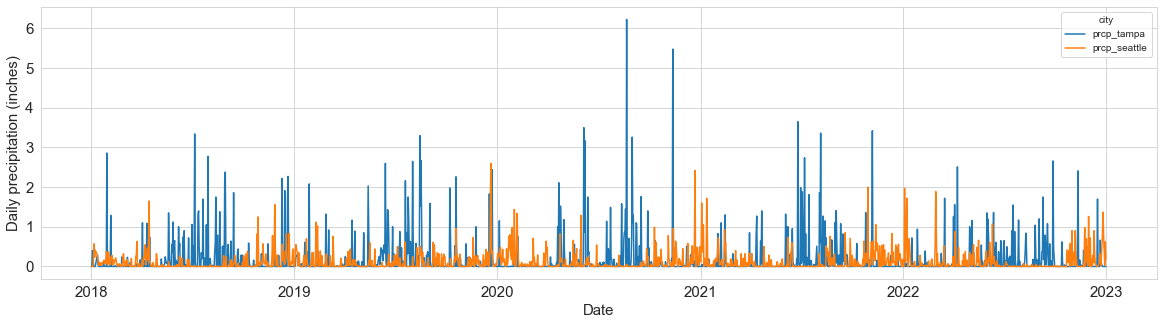

In [72]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df, x='date', y='precipitation', hue='city')

plt.xlabel('Date', fontsize=15)
plt.ylabel('Daily precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

-> This block of code calculates and displays summary statistics for daily precipitation for each city. 

In [73]:
df[['city','precipitation']].groupby('city').describe()

precipitation                                                
                     count      mean       std  min  25%   50%   75%   max
city                                                                      
prcp_seattle        1812.0  0.113754  0.240161  0.0  0.0  0.01  0.12  2.60
prcp_tampa          1812.0  0.172687  0.485871  0.0  0.0  0.00  0.07  6.23

It groups the data by city and provides descriptive measures such as count, mean, standard deviation, minimum, quartiles, and maximum precipitation values. This gives a comprehensive statistical overview of how rainfall is distributed in Seattle and Tampa.

In [74]:
df[['city','precipitation']].groupby('city').mean()

,precipitation
city,
prcp_seattle,0.113754
prcp_tampa,0.172687


-> This calculates and shows the mean daily precipitation amount in inches. The y-axis represents the average rainfall per day across all days, including dry ones where precipitation = 0. 

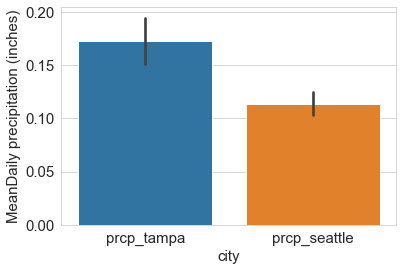

In [75]:
sns.barplot(data=df, x='city', y='precipitation')

plt.ylabel('precipitation(inches)', fontsize=15)
plt.xlabel('city',fontsize=15)
plt.ylabel('MeanDaily precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

From the ouput, Tampa averages around 0.18 inches/day tall bar, while Seattle is around 0.12 inches/day. This metric emphasizes rainfall intensity and total volume, answering How much does it rain on average per day? which Highlights average rainfall amounts, showing Tampa as rainier overall in terms of volume. 

In [76]:
df['month']=pd.DatetimeIndex(df['date']).month
df.head()

,date,city,precipitation,day_of_year,month
0,2018-01-01,prcp_tampa,0.00,1,1
1,2018-01-02,prcp_tampa,0.02,2,1
2,2018-01-03,prcp_tampa,0.40,3,1
3,2018-01-04,prcp_tampa,0.33,4,1
4,2018-01-05,prcp_tampa,0.00,5,1


In [77]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

-> This step helps To gain deeper insights into the seasonal patterns and variability of daily precipitation in Tampa and Seattle, we can group the data by month and visualize the distributions using a boxplot. 

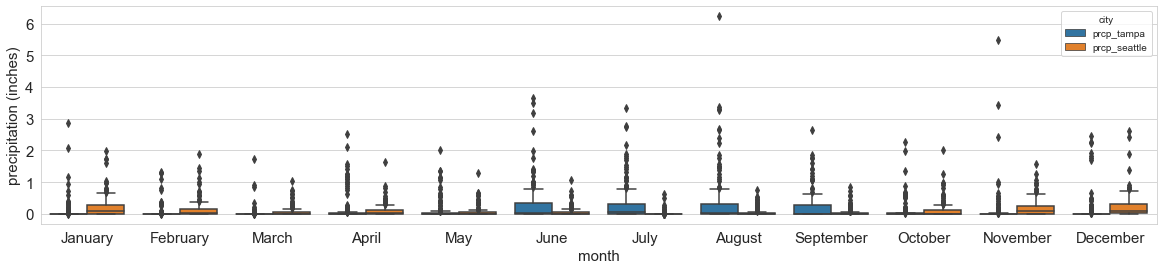

In [78]:
plt.figure(figsize=(20, 4))

sns.boxplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('month', fontsize=15)
plt.ylabel('precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)


import calendar
month_names=list(calendar.month_name[1:])
plt.xticks(ticks=range(12),labels=month_names)
plt.show()

It creates a horizontal boxplot showing the distribution of daily precipitation for each month, separated by city. This plot will show the median, quartiles, and outliers for each month's precipitation values, separated by city, allowing us to compare not just averages but the full range of daily rainfall throughout the year.

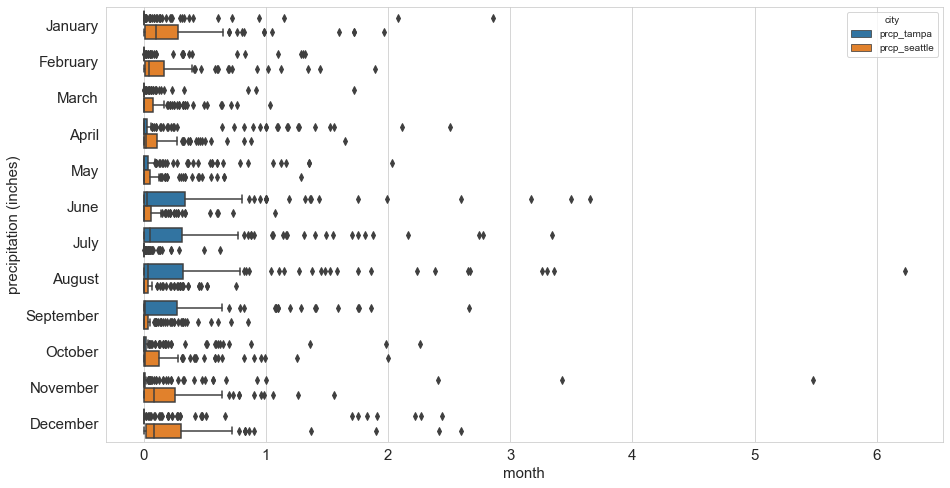

In [79]:
plt.figure(figsize=(15, 8))

sns.boxplot(data=df, x='precipitation', y='month', hue='city', orient='h')

plt.ylabel('precipitation (inches)', fontsize=15)
plt.xlabel('month', fontsize=15)

plt.tick_params(labelsize=15)
plt.yticks(ticks=range(12),labels=month_names)
plt.show()

The code has swapped x and y labels to correct them as shown below for accuracy (xlabel for precipitation, ylabel for month). Assuming the DataFrame df is already in long format with 'month', 'city', and 'precipitation' columns as prepared earlier. This helps us see the boxplots better than the above one.

-> This block plots To zoom in on the lower range of daily precipitation values for a clearer comparison of typical rainfall patterns across months in Tampa and Seattle, we can apply a y-axis limit to the boxplot.

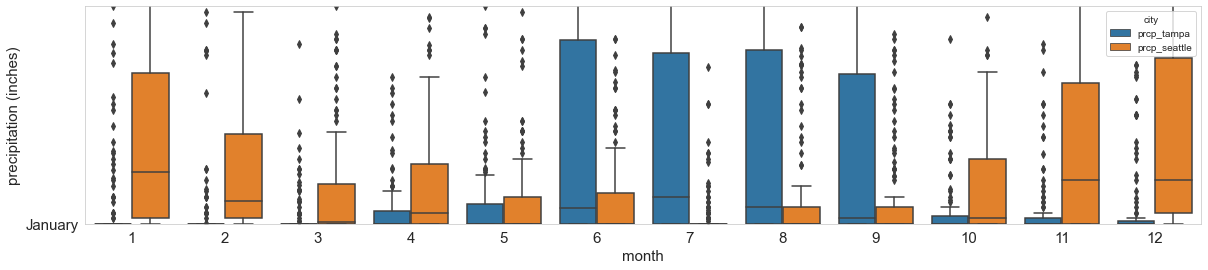

In [80]:
plt.figure(figsize=(20, 4))

sns.boxplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('month', fontsize=15)
plt.ylabel('precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)
plt.yticks(ticks=range(12),labels=month_names)
plt.ylim(0,0.4)
plt.show()

-> To examine the full distribution of daily precipitation across months for Tampa and Seattle without any axis limits, we can generate a standard vertical boxplot. This visualization reveals the medians, interquartile ranges, outliers, and overall spread for each month, differentiated by city, helping to identify seasonal patterns such as higher variability in certain months due to weather events.

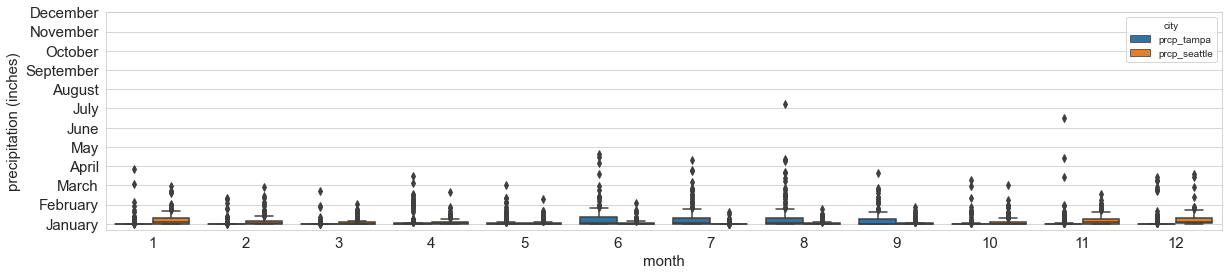

In [81]:
plt.figure(figsize=(20, 4))

sns.boxplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('month', fontsize=15)
plt.ylabel('precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)
plt.yticks(ticks=range(12),labels=month_names)

plt.show()

This lets us compute the precipitation based on cities by each month

In [82]:
df[['month', 'precipitation','city']].groupby(['city','month']).mean()

precipitation
city         month               
prcp_seattle 1           0.214443
             2           0.160865
             3           0.081388
             4           0.102789
             5           0.069161
             6           0.065781
             7           0.021194
             8           0.059116
             9           0.059427
             10          0.118452
             11          0.194812
             12          0.224903
prcp_tampa   1           0.081050
             2           0.070700
             3           0.036262
             4           0.165861
             5           0.113441
             6           0.302559
             7           0.313311
             8           0.381831
             9           0.238125
             10          0.092502
             11          0.129175
             12          0.133957

In [83]:
df['any_precipitation']=df['precipitation']>0
df.head()

,date,city,precipitation,day_of_year,month,any_precipitation
0,2018-01-01,prcp_tampa,0.00,1,1,False
1,2018-01-02,prcp_tampa,0.02,2,1,True
2,2018-01-03,prcp_tampa,0.40,3,1,True
3,2018-01-04,prcp_tampa,0.33,4,1,True
4,2018-01-05,prcp_tampa,0.00,5,1,False


-> In this step It visualizes the proportion of days with precipitation per city as bars and how frequently it rains in Tampa versus Seattle, we can compute the proportion of days with any precipitation. This provides a different perspective from average rainfall amounts, focusing on the occurrence of rainy days rather than intensity.

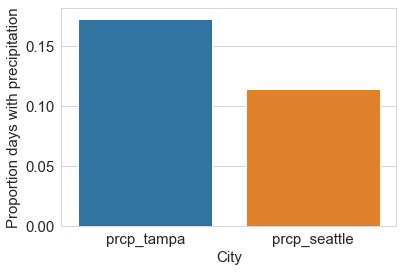

In [84]:
sns.barplot(data=df, x='city', y='precipitation', ci=None)

plt.xlabel('City', fontsize=15)
plt.ylabel('Proportion days with precipitation', fontsize=15)

plt.tick_params(labelsize=15)
plt.show()

The graph illustrates that, according to the data, Tampa experiences precipitation on a higher proportion of days around 0.15 or 15% compared to Seattle which is about 0.10 or 10%, highlighting potential differences in weather patterns such as more frequent but possibly lighter rain in Tampa.

-> In this step to break down the frequency of rainy days on a monthly basis for Tampa and Seattle, we  group the data by city and month, then compute the average of the any_precipitation indicator. This yields the proportion of rainy days per month for each city. A bar plot is then used to visualize these proportions side-by-side, facilitating a comparison of seasonal rainfall frequency patterns between the two locations.

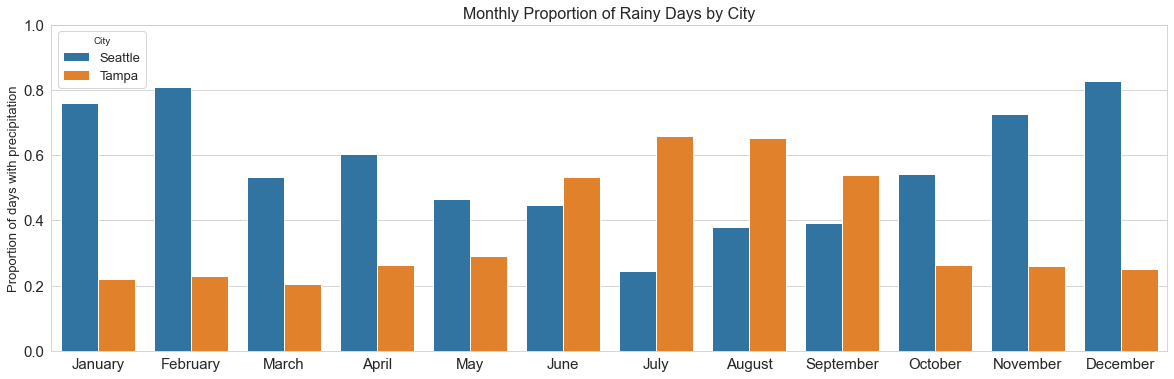

In [85]:
df['city'] = df['city'].replace({'prcp_tampa': 'Tampa', 'prcp_seattle': 'Seattle'})
proportion_by_month = (
    df.groupby(['city', 'month'])['any_precipitation']
    .mean()
    .reset_index()
)
plt.figure(figsize=(20, 6))
sns.barplot(data=proportion_by_month, x='month', y='any_precipitation', hue='city')

plt.ylabel('Proportion of days with precipitation', fontsize=13)
plt.xlabel(None)
plt.xticks(ticks=range(12), labels=month_names)
plt.tick_params(labelsize=15)
plt.ylim(0, 1)
plt.title('Monthly Proportion of Rainy Days by City', fontsize=16)
plt.legend(title='City', fontsize=13)
plt.show()

The graph reveals contrasting seasonal trends Seattle experiences a higher proportion of rainy days during the fall and winter months 0.8 mostly in November and December, with drier summers dropping to about 0.2 in July and August. Along with this, Tampa shows the reverse, with rainy day proportions spiking in the summer rainy season around 0.6-0.7 in June through August and lower values in winter around 0.2. 

-> In this Step, To inspect the daily precipitation amounts in January for Tampa and Seattle, we filter the melted DataFrame to include only data from month 1 that is January and use a histogram to visualize the frequency of different precipitation levels. which helps reveal patterns such as the prevalence of dry days at 0 inches versus days with varying rainfall intensities.

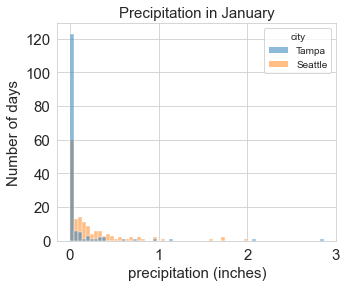

In [86]:
plt.figure(figsize=(5, 4))

sns.histplot(data=df.loc[df['month']==1], x='precipitation', hue='city')

plt.xlabel('precipitation (inches)', fontsize=15)
plt.ylabel('Number of days', fontsize=15)
plt.title('Precipitation in January', fontsize=15)

plt.tick_params(labelsize=15)


plt.show()

The graph shows that both cities experience a large number of dry or near-dry days in January, but Tampa has a higher frequency of days with low to moderate precipitation compared to Seattle, indicating more frequent light rain events in Tampa during this winter month. Seattle's distribution is more skewed toward zero, with fewer rainy days overall.

-> Here we are importing the stats module from scipy to use its statistical functions later in our analysis.

In [87]:
from scipy import stats
print(df.columns)          
print(df['month'].head()) 
print(df['city'].unique())

Index(['date', 'city', 'precipitation', 'day_of_year', 'month',
       'any_precipitation'],
      dtype='object')
0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64
['Tampa' 'Seattle']


we print the first few values of the month column to ensure the data is correctly formatted.

-> In this step to determine if the observed differences in monthly mean daily precipitation between Tampa and Seattle are statistically significant, we can apply a two-sample t-test to the data for each month separately. This statistical test compares the means of the two independent samples (daily precipitation values from each city) and computes a t-statistic and p-value.

In [88]:
significance_level = 0.05
significantly_different = np.zeros(12)

for month in range(1, 13):
    sea_data = df.loc[(df['city'] == 'Seattle') & (df['month'] == month), 'precipitation']
    tmp_data = df.loc[(df['city'] == 'Tampa') & (df['month'] == month), 'precipitation']
    
    if len(sea_data) > 0 and len(tmp_data) > 0 and (sea_data.std() > 0 or tmp_data.std() > 0):
        t_statistic, p_value = stats.ttest_ind(sea_data, tmp_data, equal_var=False)
    else:
        t_statistic, p_value = np.nan, np.nan
    
    if not np.isnan(p_value) and p_value < significance_level:
        significantly_different[month-1] = 1
    
    print(f"Month {month}:")
    print(f" t-statistic = {t_statistic}")
    print(f" p-value t test = {p_value}")
    print("_" * 20)


Month 1:
 t-statistic = 3.4916766351475754
 p-value t test = 0.0005528377391260241
____________________
Month 2:
 t-statistic = 2.758884501438194
 p-value t test = 0.006215192745358785
____________________
Month 3:
 t-statistic = 2.3144868762934823
 p-value t test = 0.02131398692648422
____________________
Month 4:
 t-statistic = -1.616422639425409
 p-value t test = 0.10749939554523479
____________________
Month 5:
 t-statistic = -1.6064542924652316
 p-value t test = 0.10950079720976916
____________________
Month 6:
 t-statistic = -4.525554457230182
 p-value t test = 1.145822530602925e-05
____________________
Month 7:
 t-statistic = -6.191881397976823
 p-value t test = 4.864672096677887e-09
____________________
Month 8:
 t-statistic = -4.791211497860968
 p-value t test = 3.728198453626667e-06
____________________
Month 9:
 t-statistic = -4.643740635526116
 p-value t test = 6.668080506932227e-06
____________________
Month 10:
 t-statistic = 0.8159552293948201
 p-value t test = 0.4151681

The ouput initializes the significance level and an array to track significant months, then loops through each month to extract the relevant data subsets revealing months with significant differences, such as potentially higher p-values in transitional seasons and lower ones in peak rainy periods for each city.

-> This plot visualize the average daily precipitation trends across months for Tampa and Seattle, we can aggregate the data by month and city to compute means, then use a grouped bar plot for side-by-side comparison. Additionally, based on the earlier t-test results stored in the significantly_different array, asterisks are placed above months with significant differences at a fixed y-position for visibility, aiding in identifying seasons where one city's rainfall statistically exceeds the other's.

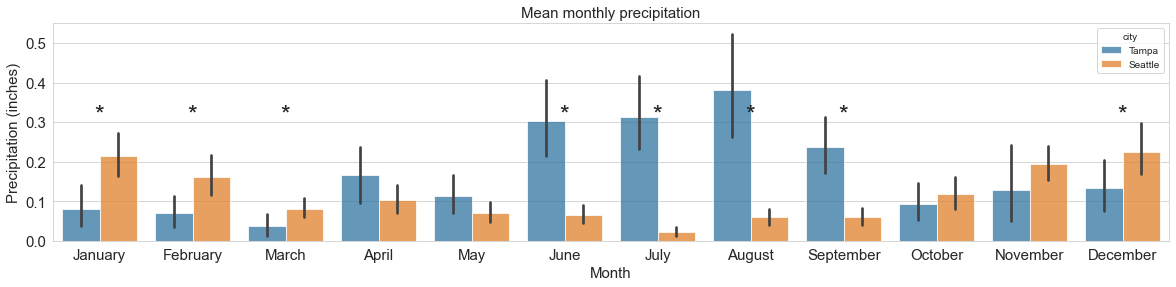

In [89]:
plt.figure(figsize=(20, 4))
sns.barplot(data=df, x='month', y='precipitation', hue='city', alpha=0.75)


plt.xlabel('Month',fontsize=15)
plt.ylabel('Precipitation (inches)',fontsize=15)
plt.title('Mean monthly precipitation', fontsize=15)

plt.tick_params(labelsize=15)
plt.xticks(ticks=range(12),labels=month_names)

for month in range(12):
    if significantly_different[month]==1:
        plt.text(month, 0.3, '*', ha='center', fontsize=25)

plt.show()

The ouput barplot shows seasonal contrasts Seattle generally experiences higher mean precipitation during the cooler months consistent with its reputation for rainy winters, while Tampa shows elevated averages in the summer driven by tropical storms thunderstorms. August stands out with Tampa mean notably higher than Seattle illustrating Tampa wetter summer pattern. Significant differences are marked with asterisks suggesting potential updates to the t-test with city filters.

-> This block is performing a two-proportion z-test for each month to check if the proportion of days with precipitation is significantly different between the two cities. It creates a contingency table of days with/without precipitation, calculates the z-statistic and p-value, and records whether the difference is statistically significant.

In [90]:
from statsmodels.stats.proportion import proportions_ztest
significance_level = 0.05
significantly_different_proportion = np.zeros(12)

for month in range(1, 13):
    contingency_table = pd.crosstab(
        df.loc[df['month'] == month, 'city'],
        df.loc[df['month'] == month, 'any_precipitation']  
    )
    
    days_with_precipitation = contingency_table[True]
    total_counts = contingency_table.sum(axis=1)
    
    zstat, p_value = proportions_ztest(count=days_with_precipitation, nobs=total_counts, alternative='two-sided')
    
    if p_value < significance_level:
        significantly_different_proportion[month-1] = 1
    
    print(f"Month {month}:")
    print(f" z-statistic = {zstat:.2f}") 
    print(f" p-value = {p_value:.3f}") 
    print("_" * 20)

Month 1:
 z-statistic = 9.35
 p-value = 0.000
____________________
Month 2:
 z-statistic = 9.59
 p-value = 0.000
____________________
Month 3:
 z-statistic = 5.94
 p-value = 0.000
____________________
Month 4:
 z-statistic = 5.96
 p-value = 0.000
____________________
Month 5:
 z-statistic = 3.16
 p-value = 0.002
____________________
Month 6:
 z-statistic = -1.50
 p-value = 0.133
____________________
Month 7:
 z-statistic = -7.30
 p-value = 0.000
____________________
Month 8:
 z-statistic = -4.77
 p-value = 0.000
____________________
Month 9:
 z-statistic = -2.55
 p-value = 0.011
____________________
Month 10:
 z-statistic = 4.98
 p-value = 0.000
____________________
Month 11:
 z-statistic = 8.08
 p-value = 0.000
____________________
Month 12:
 z-statistic = 10.14
 p-value = 0.000
____________________


This table summarizes the number of rainy days vs non rainy days as per the cities seattle and tampa.

-> Here we are creating a contingency table for January to summarize the relationship between the city and whether there was any precipitation

In [91]:
contingency_table = pd.crosstab(
    df.loc[df['month']==1, 'city'],
    df.loc[df['month']==1, 'any_precipitation']  
)
contingency_table


any_precipitation,False,True
city,,
Seattle,36,114
Tampa,117,33


The resulting contingency_table clearly shows the number of days with and without precipitation for each city in January.

-> This this step we assess differences in the frequency of rainy days between Tampa and Seattle on a monthly basis, we can first compute the proportion of days with any precipitation by aggregating means per month and city. Assuming the z-test indicates a p-value below 0.05, denoting reliable differences in rainy day occurrence.

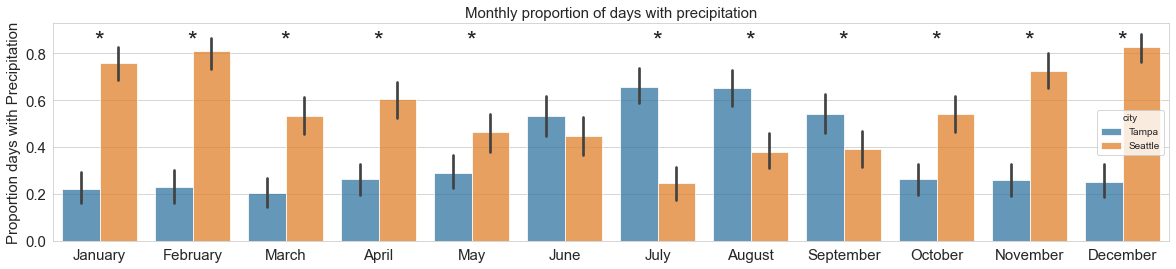

In [92]:
plt.figure(figsize=(20, 4))
sns.barplot(data=df, x='month', y='any_precipitation', hue='city', alpha=0.75)


plt.xlabel(None)
plt.ylabel('Proportion days with Precipitation',fontsize=15)
plt.title('Monthly proportion of days with precipitation', fontsize=15)
plt.xticks(ticks=range(12),labels=month_names)

plt.tick_params(labelsize=15)

for month in range(12):
    if significantly_different_proportion[month]==1:
        plt.text(month, 0.825, '*', ha='center', fontsize=25)

plt.show()

The final plot shows clear seasonal opposites Seattle dominates with higher proportions of rainy days during the wetter fall and winter seasons approaching higher precipitation in December, while Tampa shows elevated frequencies in the summer monsoon period around a little in between in July and August. Along with a general claim of more rain in Seattle overall, the data reveals Tampa has fewer rainy days year-round but with potential for intense events nearly all months are marked as significantly different,contrasting climates Seattle's persistent drizzle vs the Tampa's thunderstorms.